In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chardet, os

paths = os.listdir('습도데이터 raw')
df_file = []


# 파일 인코딩 감지
for p in paths:
    file_path = '습도데이터 raw/'+p
    with open(file_path, 'rb') as file:
        rawdata = file.read(10000)
        result = chardet.detect(rawdata)
        encoding = result['encoding']
        print(f"Detected encoding: {encoding}")

    df_file.append(pd.read_csv(file_path, encoding='EUC-KR'))
 

Detected encoding: EUC-KR
Detected encoding: EUC-KR
Detected encoding: EUC-KR
Detected encoding: EUC-KR
Detected encoding: EUC-KR
Detected encoding: GB2312
Detected encoding: EUC-KR


In [48]:
for df in df_file:
    df.dropna(subset=['일시'], axis=0, inplace=True)
    print(df.isnull().sum().sum())

0
0
15
2
2
7
6


In [49]:
df_file[0].columns

Index(['\t\t지점번호', '지점명', '일시', '평균습도(%rh)', '최저습도(%rh)'], dtype='object')

<AxesSubplot:>

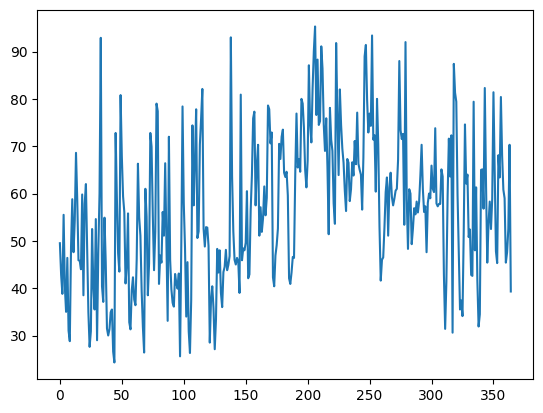

In [50]:
df_file[0]['평균습도(%rh)'][:365].plot()

In [51]:
# 평균습도 최저습도 결측치는 보간법을 사용하여 처리함.
for df in df_file:
    df.interpolate(method='spline', order=3)

In [52]:
for df in df_file:
    df.drop(['\t\t지점번호'], axis=1, inplace=True)
    df['일시'] = df['일시'].apply(lambda s: ''.join([part.zfill(2) if i != 0 else part for i, part in enumerate(s.split('.'))]))
    df.set_index('일시', inplace=True)

In [56]:
location = []
for df in df_file:
    location.append(df['지점명'][0])
    continue

In [58]:
for i in range(len(df_file)):
    df_file[i].to_csv('{} 습도 데이터.csv'.format(location[i]), encoding='utf-8')